In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/mbajk_dataset.csv')

df.head()

,date,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,bike_stands,available_bike_stands
0,2023-07-30 12:12:58+00:00,24.1,69,18.1,27.5,27.0,0.0,981.3,22,13
1,2023-09-11 20:14:06+00:00,19.2,85,16.6,20.9,0.0,0.0,981.7,22,0
2,2023-07-09 05:12:32+00:00,NaN,92,16.2,19.2,0.0,0.0,989.1,22,8
3,2023-07-21 12:37:13+00:00,NaN,64,17.2,27.2,94.0,0.0,978.8,22,14
4,2023-07-03 17:01:20+00:00,NaN,80,17.3,22.9,NaN,NaN,982.4,22,21


In [9]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

df['weekend'] = np.where(df['date'].dt.dayofweek > 4, 1, 0)

df.drop('date', axis=1, inplace=True)
df.head()

,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,bike_stands,available_bike_stands,year,month,day,hour,weekend
0,24.1,69,18.1,27.5,27.0,0.0,981.3,22,13,2023,7,30,12,1
1,19.2,85,16.6,20.9,0.0,0.0,981.7,22,0,2023,9,11,20,0
2,NaN,92,16.2,19.2,0.0,0.0,989.1,22,8,2023,7,9,5,1
3,NaN,64,17.2,27.2,94.0,0.0,978.8,22,14,2023,7,21,12,0
4,NaN,80,17.3,22.9,NaN,NaN,982.4,22,21,2023,7,3,17,0


In [10]:
df.isnull().sum()

temperature                  2781
relative_humidity               0
dew_point                       0
apparent_temperature            0
precipitation_probability    4315
rain                         4151
surface_pressure                0
bike_stands                     0
available_bike_stands           0
year                            0
month                           0
day                             0
hour                            0
weekend                         0
dtype: int64

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

input_cols = df.columns.tolist()
output_cols = ['temperature', 'precipitation_probability', 'rain']

for col in output_cols:
    input_cols.remove(col)

for target_column in output_cols:
    # Step 1: Select rows with missing values in the target column
    missing_data = df[df[target_column].isnull()]

    # Step 2: Create a copy of the original DataFrame for processing
    df_copy = df.copy()

    # Remove rows with missing values in the target column from the copy
    df_copy.dropna(subset=[target_column], inplace=True)

    # Step 3: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_copy[input_cols], df_copy[target_column], test_size=0.30)

    # Step 4: Train a Linear Regression model on the training data
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Step 5: Make predictions for missing values in the target column
    predictions = regression_model.predict(missing_data[input_cols])

    # Step 6: Fill in missing values with predicted values
    df.loc[missing_data.index, target_column] = predictions

In [12]:
df.isnull().sum()

temperature                  0
relative_humidity            0
dew_point                    0
apparent_temperature         0
precipitation_probability    0
rain                         0
surface_pressure             0
bike_stands                  0
available_bike_stands        0
year                         0
month                        0
day                          0
hour                         0
weekend                      0
dtype: int64

In [13]:

df.isnull().sum()

temperature                  0
relative_humidity            0
dew_point                    0
apparent_temperature         0
precipitation_probability    0
rain                         0
surface_pressure             0
bike_stands                  0
available_bike_stands        0
year                         0
month                        0
day                          0
hour                         0
weekend                      0
dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


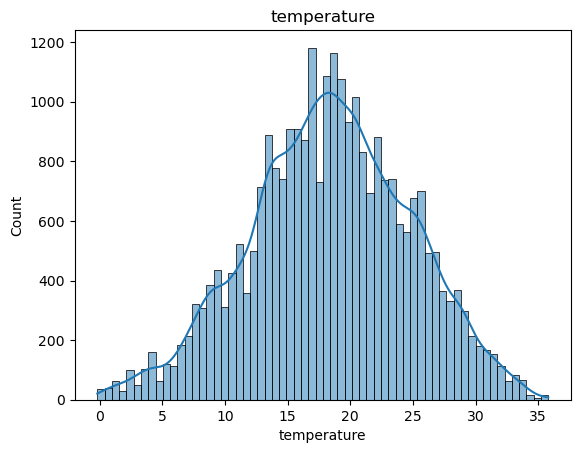

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


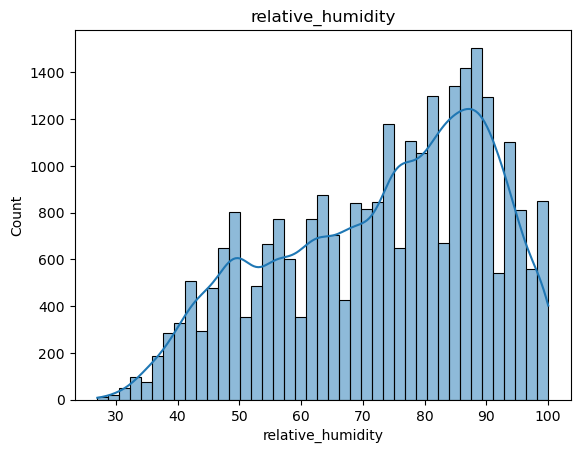

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


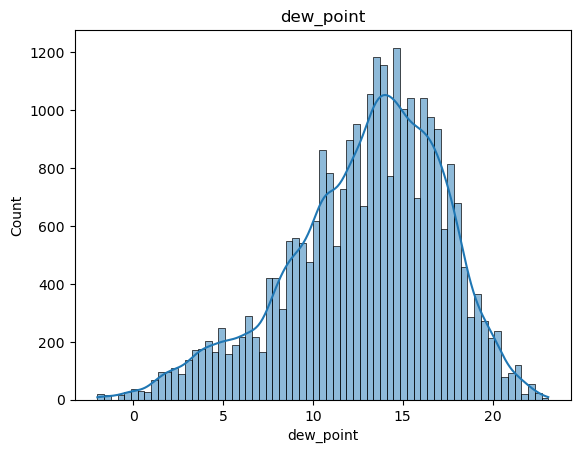

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


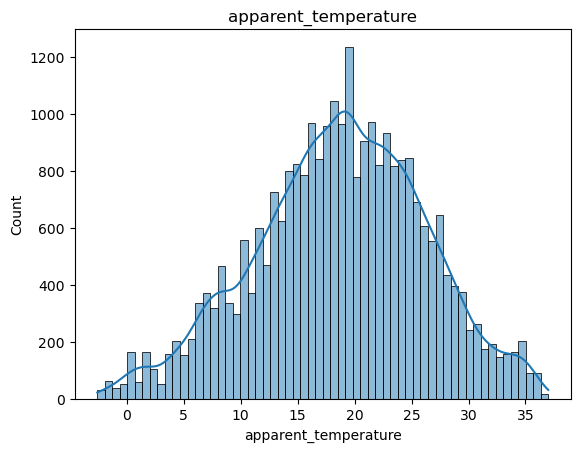

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


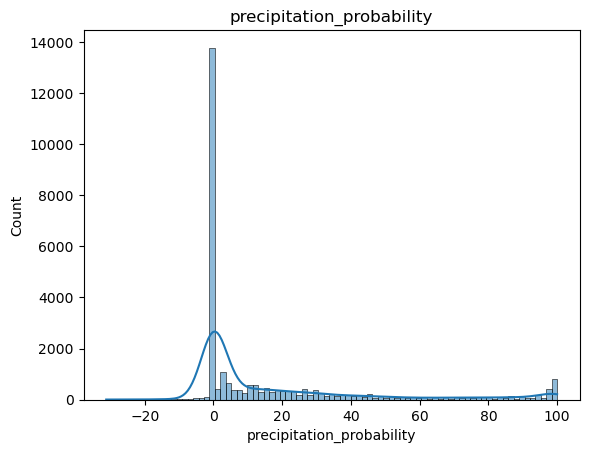

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


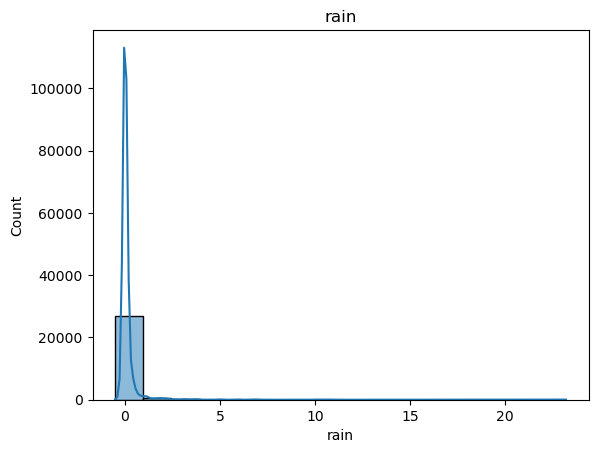

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


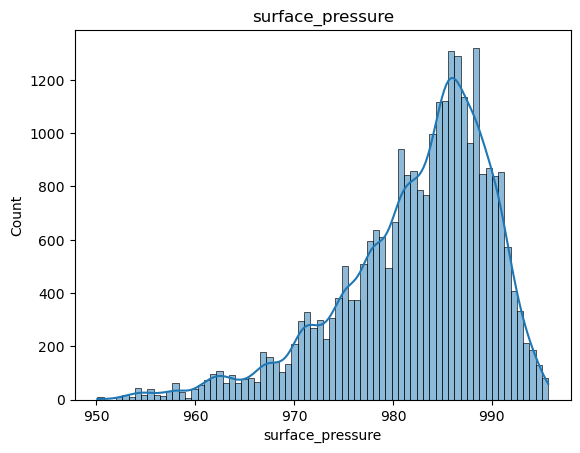

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


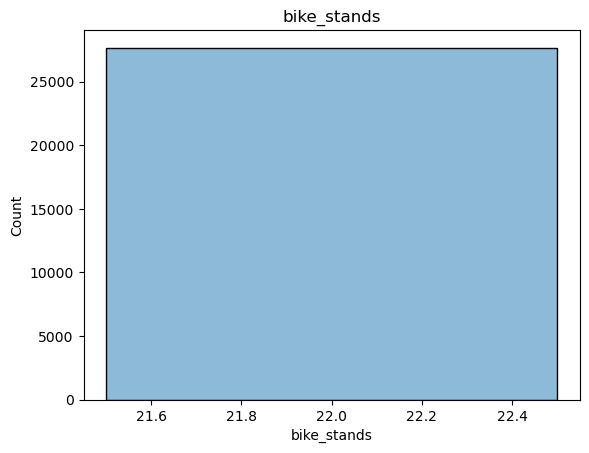

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


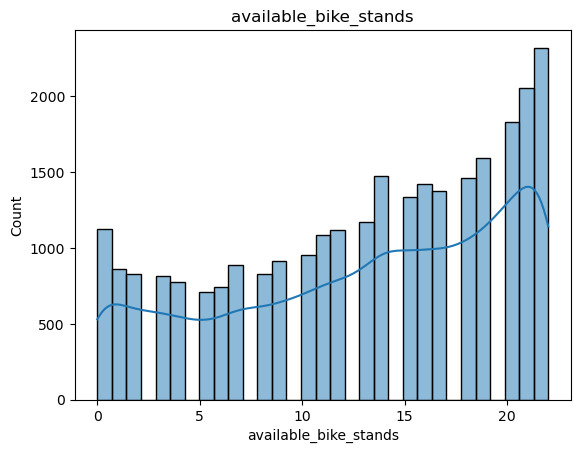

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


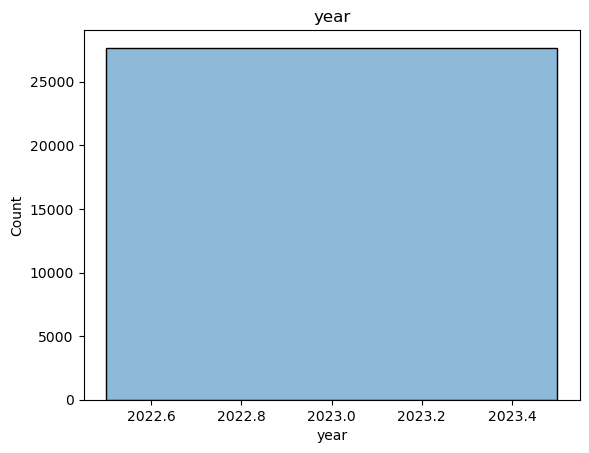

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


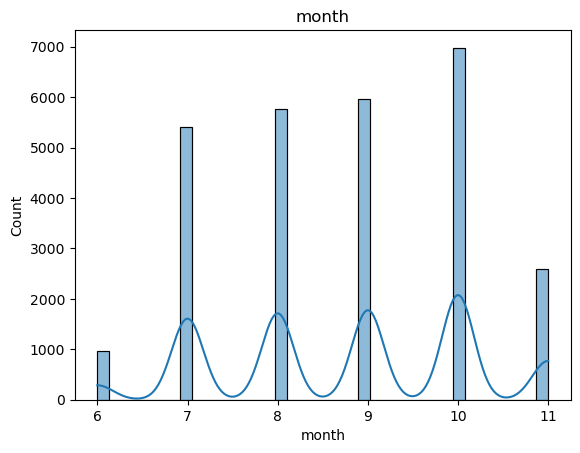

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


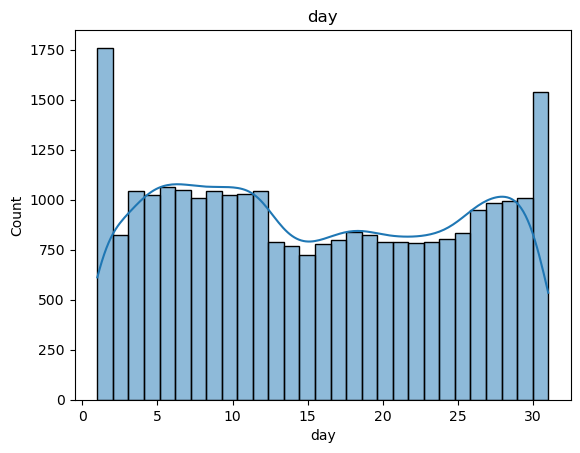

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


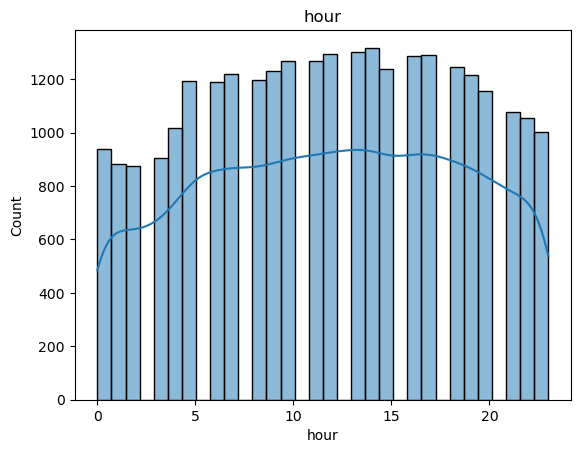

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


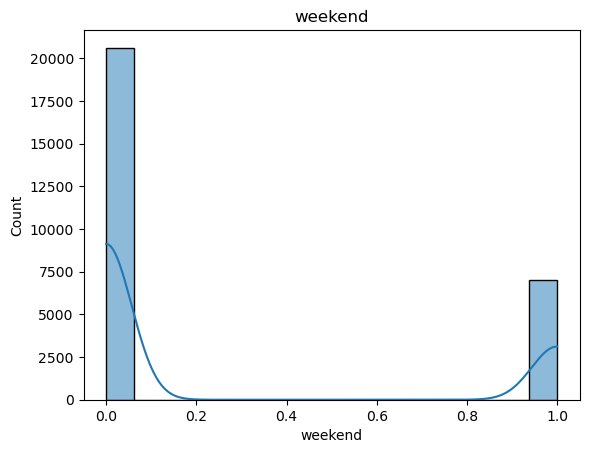

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include='number').columns.tolist()

# Create histograms for each numerical column using Seaborn
for column in numerical_columns:
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


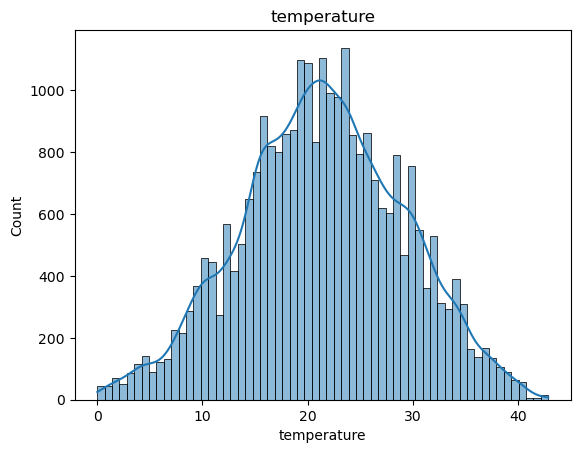

In [15]:
import numpy as np
from scipy.stats import boxcox

df['temperature'] = df['temperature']  + (abs(df['temperature'].min()) + 1)
df['temperature'], _ = boxcox(df['temperature'])
sns.histplot(df['temperature'], kde=True)
plt.title("temperature")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


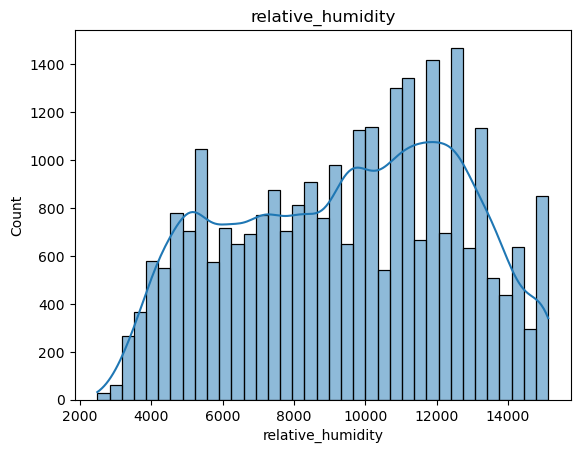

In [16]:
df['relative_humidity'] = df['relative_humidity']  + (abs(df['relative_humidity'].min()) + 1)
df['relative_humidity'], _ = boxcox(df['relative_humidity'])
sns.histplot(df['relative_humidity'], kde=True)
plt.title("relative_humidity")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


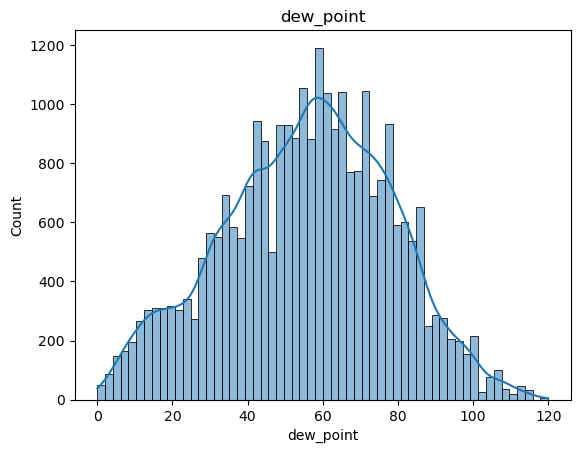

In [17]:
df['dew_point'] = df['dew_point']  + (abs(df['dew_point'].min()) + 1)
df['dew_point'], _ = boxcox(df['dew_point'])
sns.histplot(df['dew_point'], kde=True)
plt.title("dew_point")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


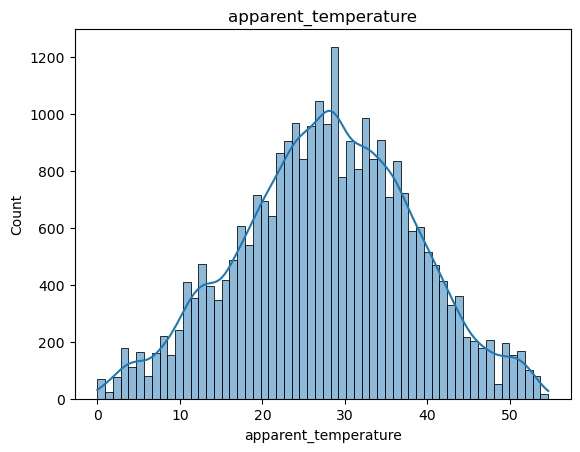

In [18]:
df['apparent_temperature'] = df['apparent_temperature']  + (abs(df['apparent_temperature'].min()) + 1)
df['apparent_temperature'], _ = boxcox(df['apparent_temperature'])
sns.histplot(df['apparent_temperature'], kde=True)
plt.title("apparent_temperature")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2489: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)
/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


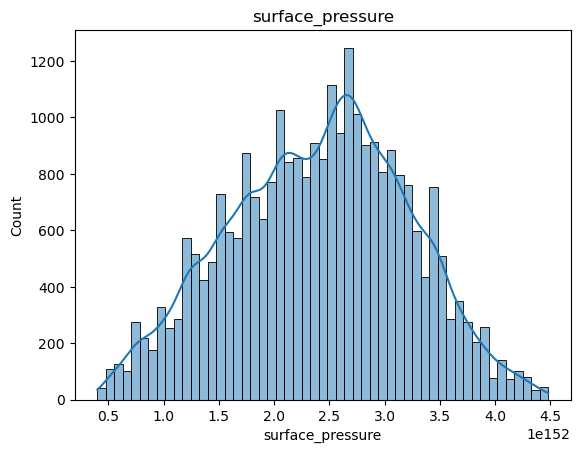

In [19]:
df['surface_pressure'], _ = boxcox(df['surface_pressure'])
sns.histplot(df['surface_pressure'], kde=True)
plt.title("surface_pressure")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


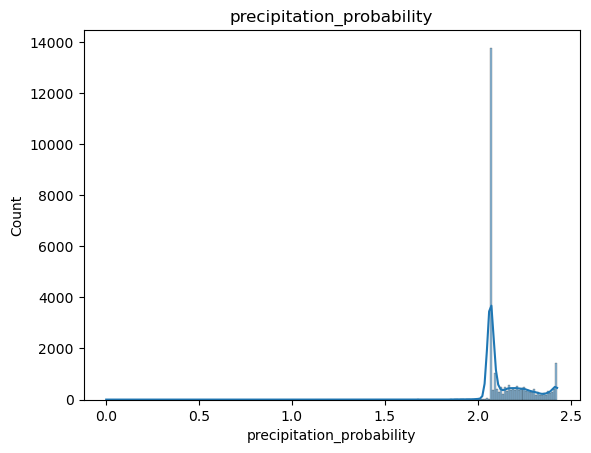

In [20]:
df['precipitation_probability'] = df['precipitation_probability']  + (abs(df['precipitation_probability'].min()) + 1)
df['precipitation_probability'], _ = boxcox(df['precipitation_probability'])
sns.histplot(df['precipitation_probability'], kde=True)
plt.title("precipitation_probability")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


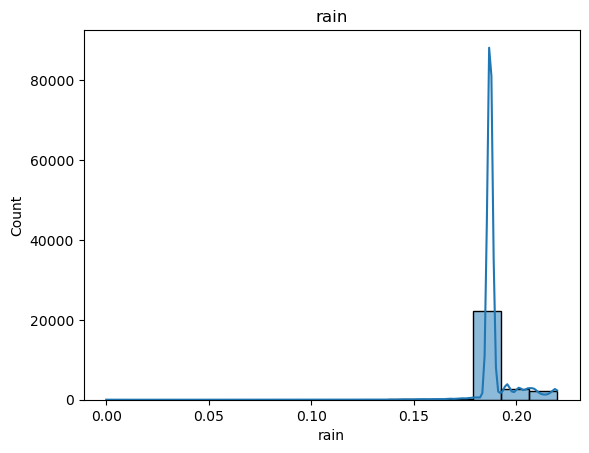

In [21]:
df['rain'] = df['rain'] + (abs(df['rain'].min()) + 1)
df['rain'], _ = boxcox(np.array(df['rain']))
sns.histplot(df['rain'], kde=True)
plt.title("rain")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


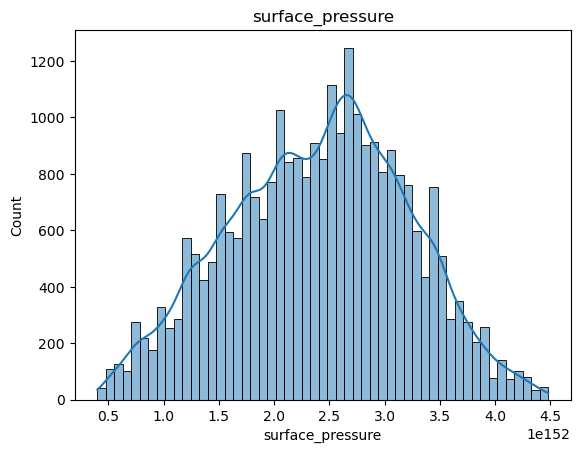

In [22]:
df['surface_pressure'], _ = boxcox(df['surface_pressure'])
sns.histplot(df['surface_pressure'], kde=True)
plt.title("surface_pressure")
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [24]:
from sklearn.preprocessing import StandardScaler

normally_distributed = [
 'temperature',
 'relative_humidity',
 'dew_point',
 'apparent_temperature',
 'surface_pressure'
]

scaler = StandardScaler()
df[normally_distributed] = scaler.fit_transform(df[normally_distributed])

In [25]:
df['apparent_temperature_difference'] = df['temperature'] - df['apparent_temperature']

df["day_time"] = np.where((df["hour"] >= 6) & (df["hour"] <= 18), 1, 0)

In [26]:
from sklearn.feature_selection import mutual_info_regression

input_cols = df.columns.tolist()
output_col = "available_bike_stands"
input_cols.remove(output_col)

information_gain_scores = mutual_info_regression(df[input_cols], df[output_col])

feature_importances = pd.DataFrame({
    'feature': df[input_cols].columns,
    'information_gain': information_gain_scores
})

feature_scores = feature_importances.sort_values(by='information_gain', ascending=False)

feature_scores.head(10)

,feature,information_gain
13,apparent_temperature_difference,0.849034
3,apparent_temperature,0.308523
6,surface_pressure,0.283869
0,temperature,0.254815
11,hour,0.184872
2,dew_point,0.170291
4,precipitation_probability,0.162305
1,relative_humidity,0.102979
10,day,0.075193
5,rain,0.070425


In [27]:
input_data = feature_scores['feature'].tolist()[:5]
print(input_data)

['apparent_temperature_difference', 'apparent_temperature', 'surface_pressure', 'temperature', 'hour']


In [28]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, \
    BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

regressors = [RandomForestRegressor(random_state=1234), BaggingRegressor(random_state=1234), AdaBoostRegressor(random_state=1234), GradientBoostingRegressor(random_state=1234), MLPRegressor(random_state=1234)]
classifiers = [BaggingClassifier(random_state=1234), RandomForestClassifier(random_state=1234), AdaBoostClassifier(random_state=1234), GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1234), MLPClassifier(random_state=1234)]


x = df[input_cols]
y = df[output_col]

k_fold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

results = {regressor.__class__.__name__: {'mea': [], 'mse': [], 'explained_variance': []} for regressor in regressors}

for train_index, test_index in k_fold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for regressor in regressors:
        reg_name = regressor.__class__.__name__
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        explained_variance = explained_variance_score(y_test, y_pred)
        
        results[reg_name]['mea'].append(mae)
        results[reg_name]['mse'].append(mse)
        results[reg_name]['explained_variance'].append(explained_variance)

# results to df
results_df = pd.DataFrame.from_dict({(i): results[i]
                                     for i in results.keys()},
                                    orient='index')

results_df.head(len(regressors))

,mea,mse,explained_variance
RandomForestRegressor,"[0.05256089755590263, 0.05306048701142693, 0.0...","[0.0065689714876878405, 0.006472659750266637, ...","[0.931789242503206, 0.9312845868040839, 0.9342..."
BaggingRegressor,"[0.0558445685092324, 0.055502245082731015, 0.0...","[0.00734291648730371, 0.007172155259463786, 0....","[0.9237450871449668, 0.9238604151732643, 0.927..."
AdaBoostRegressor,"[0.2222705135466779, 0.21928205994847522, 0.22...","[0.06809173701380039, 0.06729155596771565, 0.0...","[0.29482413899415594, 0.2858826847642154, 0.30..."
GradientBoostingRegressor,"[0.18148806440808218, 0.18227221684194558, 0.1...","[0.048966215442838405, 0.04935567062039393, 0....","[0.4913726268000984, 0.47594501460444594, 0.49..."
MLPRegressor,"[0.14538590723362152, 0.14933115145002773, 0.1...","[0.033936104558690366, 0.036362152416723074, 0...","[0.6502610691260434, 0.6175672578918567, 0.638..."


In [30]:
avg_reg_results = {}
for model_name, model_scores in results.items():
    print(model_name, ':')
    avg_reg_results[model_name] = {}
    for metric, scores in model_scores.items():
        print(' ', metric, np.mean(scores))
        avg_reg_results[model_name][metric] = np.mean(scores)

RandomForestRegressor :
  mea 0.05251764095149501
  mse 0.006427826866993077
  explained_variance 0.9319617917418542
BaggingRegressor :
  mea 0.05503693113256616
  mse 0.0070820654688406705
  explained_variance 0.9250453594773347
AdaBoostRegressor :
  mea 0.22026293051303564
  mse 0.06723423597300923
  explained_variance 0.2909131263597488
GradientBoostingRegressor :
  mea 0.18086687316950817
  mse 0.048620997112530935
  explained_variance 0.48539360072142906
MLPRegressor :
  mea 0.14750819237653667
  mse 0.035238629160902105
  explained_variance 0.6306488496855577


In [31]:
maes = {}
mses = {}
evs = {}

for i in results:
    maes[i] = results[i]['mea']
    mses[i] = results[i]['mse']
    evs[i] = results[i]['explained_variance']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor'),
  Text(4, 0, 'MLPRegressor')])

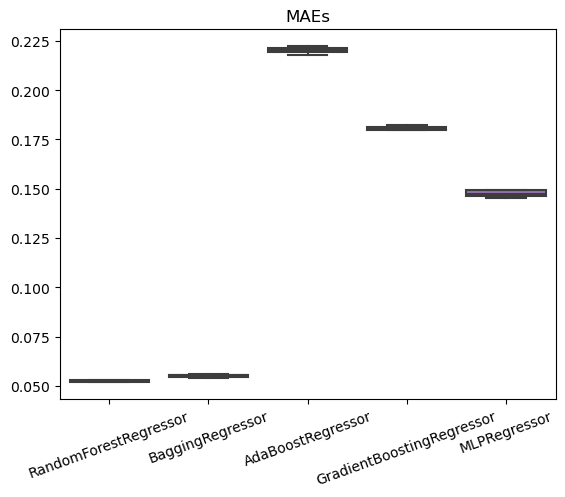

In [32]:
sns.boxplot(data=pd.DataFrame(maes)).set_title('MAEs')
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor'),
  Text(4, 0, 'MLPRegressor')])

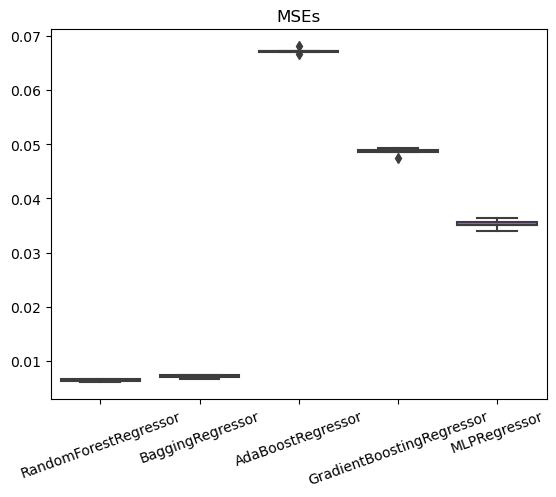

In [33]:
sns.boxplot(data=pd.DataFrame(mses)).set_title('MSEs')
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'BaggingRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor'),
  Text(4, 0, 'MLPRegressor')])

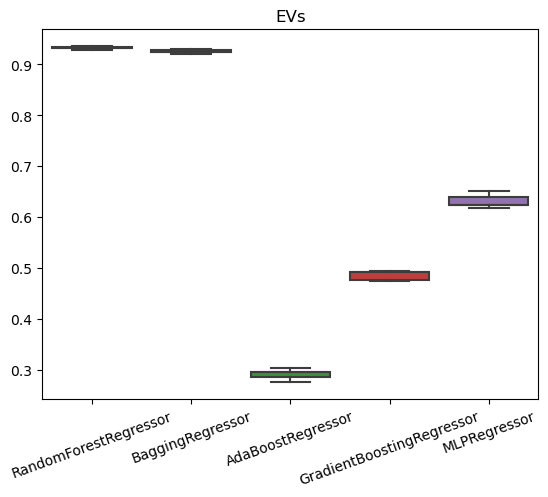

In [34]:
sns.boxplot(data=pd.DataFrame(evs)).set_title('EVs')
plt.xticks(rotation=20)

In [35]:
avg_maes = {}
avg_mses = {}
avg_evs = {}

for i in avg_reg_results:
    avg_maes[i] = avg_reg_results[i]['mea']
    avg_mses[i] = avg_reg_results[i]['mse']
    avg_evs[i] = avg_reg_results[i]['explained_variance']
    
print(avg_maes)
print(avg_mses)
print(avg_evs)

{'RandomForestRegressor': 0.05251764095149501, 'BaggingRegressor': 0.05503693113256616, 'AdaBoostRegressor': 0.22026293051303564, 'GradientBoostingRegressor': 0.18086687316950817, 'MLPRegressor': 0.14750819237653667}
{'RandomForestRegressor': 0.006427826866993077, 'BaggingRegressor': 0.0070820654688406705, 'AdaBoostRegressor': 0.06723423597300923, 'GradientBoostingRegressor': 0.048620997112530935, 'MLPRegressor': 0.035238629160902105}
{'RandomForestRegressor': 0.9319617917418542, 'BaggingRegressor': 0.9250453594773347, 'AdaBoostRegressor': 0.2909131263597488, 'GradientBoostingRegressor': 0.48539360072142906, 'MLPRegressor': 0.6306488496855577}


/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


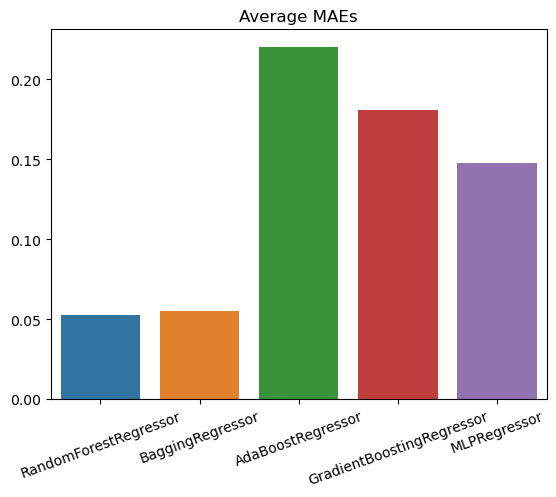

In [36]:
sns.barplot(x=list(avg_maes.keys()), y=list(avg_maes.values())).set_title('Average MAEs')
plt.xticks(rotation=20)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


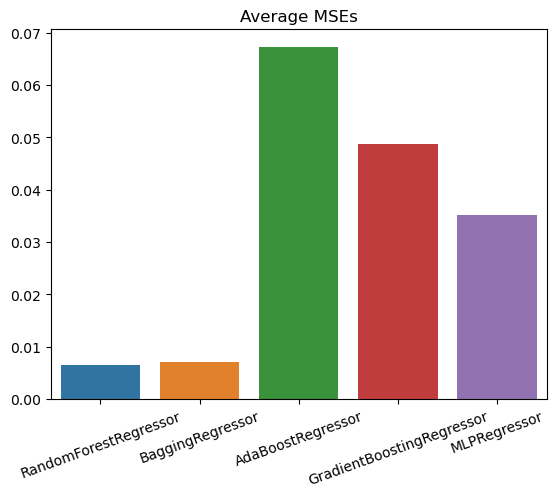

In [37]:
sns.barplot(x=list(avg_mses.keys()), y=list(avg_mses.values())).set_title('Average MSEs')
plt.xticks(rotation=20)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


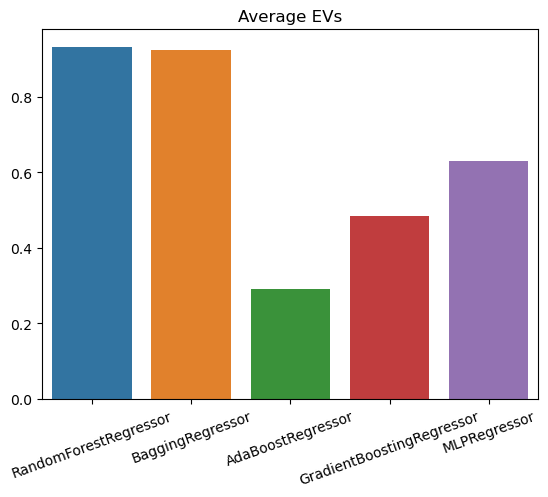

In [38]:
sns.barplot(x=list(avg_evs.keys()), y=list(avg_evs.values())).set_title('Average EVs')
plt.xticks(rotation=20)
plt.show()

In [39]:
import pickle

model = regressors[0]

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open("scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)

